# Questioning 10,000 K assumption?

In [25]:
import numpy as np
from astropy.constants import R_sun, M_sun, G, k_B, m_p
import astropy.units as u

from funcs.model import calculate_specific_flare_flux, calculate_angular_radius

def get_frac_area(radius):
    return np.sin(radius / 180 * np.pi / 2.)**2


import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)


In [26]:
a = 1. # amplitude of flare
qlum = 1e29 * u.erg / u.s # quiescent luminosity
R = .5 * R_sun # stellar radius
Teff = np.linspace(5e3,5e4,50) # BB temperature of flare

# specific flare flux at given Teff

Fth = [calculate_specific_flare_flux("TESS", flaret=t) for t in Teff]

# radius at give Fth
radius = [calculate_angular_radius(fth, a, qlum, R) for fth in Fth]

# fill factor
fill_factor = get_frac_area(np.array(radius)) * 4.

Text(0, 0.5, 'filling factor')

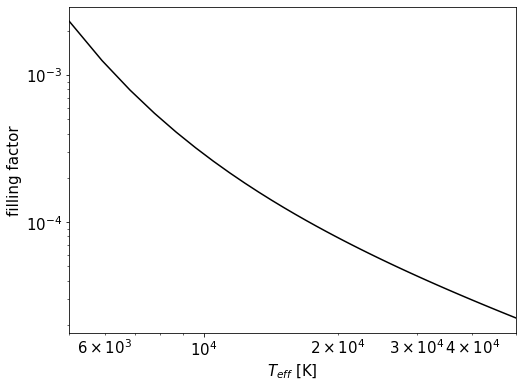

In [27]:
plt.figure(figsize=(8,6))
plt.plot(Teff, fill_factor, c="k")

# layout
plt.yscale("log")
plt.xscale("log")
plt.xlim(5e3,5e4)
plt.xlabel(r"$T_{eff}$ [K]")
plt.ylabel(r"filling factor")